##### 處理 gif 動畫
這篇教學會介紹使用 OpenCV 搭配 Pillow 函式庫，針對 gif 動畫圖檔進行開啟、編輯與儲存的動作，\
並進一步將多張圖片組合成 gif 動畫 ( 包含背景透明的 gif 圖檔 )，或將影片轉換成 gif 動畫。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 安裝 Pillow 
由於 OpenCV 無法直接處理 gif 圖檔，所以使用 Pillow 開啟 gif 動畫，輸入下面的指令，安裝 Pillow 函式庫。

* pip install Pillow

##### 開啟 gif 動畫，將每一格儲存為 jpg 
使用 Image.open 開啟 gif 動畫後，透過 ImageSequence.Iterator 搭配 for 迴圈，\
取出動畫裡每一個影格，最後使用 save 的方法將每一個影格儲存為 jpg 靜態圖檔\
( 因為 gif 的顏色模式為 P mode，如果要儲存為 jpg 必須要先轉換為 RGB，參考 Convert PIL.Image to OpenCV )。

* 範例圖檔：[gif 動畫](https://steam.oxxostudio.tw/download/python/opencv-gif-dot.gif)

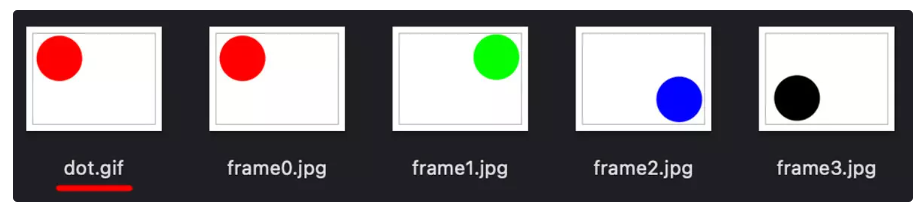

In [3]:
from PIL import Image,ImageSequence
import os

# 確認資料夾是否存在，若不存在則建立
output_folder = '33_gif_to_jpg'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

gif = Image.open('meme_gif_1.gif')                # 讀取動畫圖檔

i = 0                                      # 設定編號變數
for frame in ImageSequence.Iterator(gif):
    frame = frame.convert('RGB')           # 取出每一格轉換成 RGB
    frame.save(os.path.join(output_folder, f'frame{i}.jpg'), quality=65, subsampling=0)  # 儲存為 jpg
    i = i + 1                              # 編號增加 1

##### OpenCV 預覽 gif 動畫 
使用 PIL 讀取 gif 動畫圖檔後，搭配 NumPy 將圖檔內容轉換成 OpenCV 可以讀取的 NumPy 陣列，就能透過 OpenCV 顯示動畫的每一個影格。

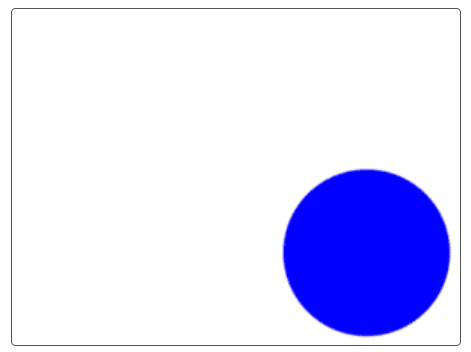

In [4]:
from PIL import Image,ImageSequence
import cv2
import numpy as np

gif = Image.open('meme_gif_1.gif')

img_list = []                                      # 建立儲存影格的空串列
for frame in ImageSequence.Iterator(gif):          # 逐一讀取每一格
    frame = frame.convert('RGBA')                  # 轉換成 RGBA
    opencv_img = np.array(frame, dtype=np.uint8)   # 轉換成 numpy 陣列
    opencv_img = cv2.cvtColor(opencv_img, cv2.COLOR_RGBA2BGRA)  # 顏色從 RGBA 轉換為 BGRA
    img_list.append(opencv_img)                    # 利用串列儲存該圖片資訊

loop = True                                        # 設定 loop 為 True
while loop:
    for i in img_list:
        cv2.imshow('oxxostudio', i)                # 不斷讀取並顯示串列中的圖片內容
        if cv2.waitKey(200) == ord('q'):
            loop = False                           # 停止時同時也將 while 迴圈停止
            break
cv2.destroyAllWindows()

##### 編輯並儲存 gif 動畫 
開啟 gif 動畫後，可以利用 OpenCV 編輯，再透過 Pillow 的 save 方法儲存為新的 gif，如果要儲存為「gif 動畫」，需要按照下方規則設定 save：

In [ ]:
frame1.save("oxxostudio.gif", save_all=True, append_images=frame_list, duration=200, disposal=2)

# frame1：gif 動畫第一個影格
# save_all：設定 True 表示儲存全部影格，否則只有第一個
# append_images：要添加到 frame1 影格的其他影格，串列格式，通常會用 frame[1:] 來添加除了第一個影格之後的所有影格
# duration：每個影格之間的毫秒數，支援串列格式
# disposal：添加模式，預設 0，如果背景透明，則設定為 2 避免影格彼此覆蓋覆蓋

下方的程式執行後，會先開啟 gif 動畫，然後在每一個影格的中間加上黑色區塊與文字，最後再組合成新的 gif 動畫。

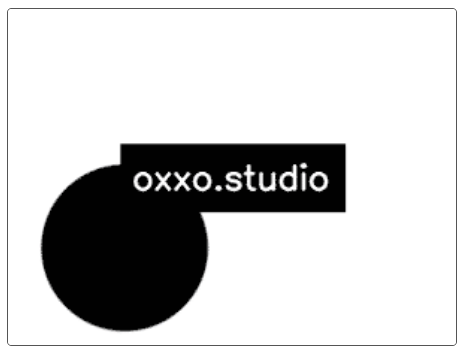

In [ ]:
from PIL import Image,ImageSequence
import cv2
import numpy as np

gif = Image.open('dot.gif')

img_list = []                                                        # 建立儲存影格的空串列
for frame in ImageSequence.Iterator(gif):                            # 逐一讀取每一格
    frame = frame.convert('RGBA')                                    # 轉換成 RGBA
    opencv_img = np.array(frame, dtype=np.uint8)                     # 轉換成 numpy 陣列
    opencv_img = cv2.cvtColor(opencv_img, cv2.COLOR_RGBA2BGRA)       # 顏色從 RGBA 轉換為 BGRA

    # 在圖形中間繪製黑色方塊
    cv2.rectangle(opencv_img,(100,120),(300,180),(0,0,0),-1)         # 繪製黑色方塊

    # 在黑色方塊上方加入文字
    text = 'oxxo.studio'
    org = (110,160)                                                 # 文字位置
    fontFace = cv2.FONT_HERSHEY_SIMPLEX                             # 字型
    fontScale = 1                                                   # 字體大小
    color = (255,255,255)                                           # 文字顏色
    thickness = 2                                                   # 文字粗細
    lineType = cv2.LINE_AA                                          # 文字線條
    cv2.putText(opencv_img, text, org, fontFace, fontScale, color, thickness, lineType) # 繪製文字

    img_list.append(opencv_img)                                    # 利用串列儲存該圖片資訊

loop = True                                                       # 設定 loop 為 True
while loop:                                                       # 當 loop 為 True 時
    for i in img_list:                                            # 逐一讀取串列中的圖片
        cv2.imshow('oxxostudio', i)                               # 顯示圖片
        if cv2.waitKey(200) == ord('q'):                          # 等待 200 毫秒，若按下 q 鍵則停止
            loop = False                                          # 將 loop 設定為 False
            break                                                 # 跳出迴圈

# 建立要輸出的影格串列
output = []                      # 建立空串列
for i in img_list:               # 逐一讀取串列中的圖片
    img = i                      # 取出圖片
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)  # 因為 OpenCV 為 BGRA，要轉換成 RGBA
    img = Image.fromarray(img)    # 轉換成 PIL 格式
    img = img.convert('RGB')      # 轉換成 RGB ( 如果是 RGBA 會自動將黑色白色變成透明色 )
    output.append(img)            # 加入 output
# 儲存為 gif 動畫圖檔
output[0].save("oxxostudio.gif", save_all=True, append_images=output[1:], duration=200, loop=0, disposal=0)
cv2.destroyAllWindows()

##### 靜態圖片組合成 gif 動畫 
單純使用 PIL 依序開啟靜態圖片，將圖片依序加入串列中，最後再透過 save 方法儲存為 gif。

* 範例圖檔：[frame0](https://steam.oxxostudio.tw/download/python/opencv-gif-frame0.jpg)、[frame1](https://steam.oxxostudio.tw/download/python/opencv-gif-frame1.jpg)、[frame2](https://steam.oxxostudio.tw/download/python/opencv-gif-frame2.jpg)、[frame3](https://steam.oxxostudio.tw/download/python/opencv-gif-frame3.jpg)

In [ ]:
from PIL import Image,ImageSequence

gif = []
for i in range(4):
    img = Image.open(f'frame{i}.jpg')  # 開啟圖片
    gif.append(img)                    # 加入串列
# 儲存為 gif
gif[0].save("oxxostudio.gif", save_all=True, append_images=gif[1:], duration=200, loop=0, disposal=0)

##### 影片轉換為 gif 動畫 
運用上方所介紹的原理，就能將影片自動轉換成 gif 動畫，轉換過程中設定 cv2.waitKey(ms) 的數值，就可以定義每多少毫秒截取一張圖片，\
也可以避免 gif 檔案大小過大的問題 ( 通常會將 cv2.waitKey(ms) 和儲存時的 duration 參數設定為相同的數值 )。

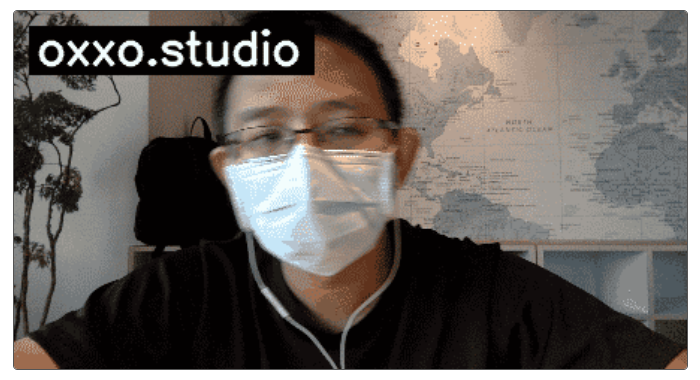

In [ ]:
from PIL import Image,ImageSequence
import cv2
import numpy as np

output = []                       # 建立輸出的空串列

cap = cv2.VideoCapture(0)         # 從攝影鏡頭取得影像
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, img = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    img = cv2.resize(img, (450,240))    # 調整影片大小

    # 加上黑色區塊
    cv2.rectangle(img,(10,10),(200,42),(0,0,0),-1)

    # 加上文字
    text = 'oxxo.studio'    
    org = (15,35)                          # 文字位置
    fontFace = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    color = (255,255,255)
    thickness = 2
    lineType = cv2.LINE_AA
    cv2.putText(img, text, org, fontFace, fontScale, color, thickness, lineType)

    gif = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)  # 轉換顏色
    gif = Image.fromarray(gif)                    # 轉換成 PIL 格式
    gif = gif.convert('RGB')                      # 轉換顏色
    output.append(gif)                            # 添加到 output

    cv2.imshow('oxxostudio', img)
    if cv2.waitKey(250) == ord('q'):
        break
cap.release()
# 儲存為 gif 動畫
output[0].save("test2.gif", save_all=True, append_images=output[1:], duration=250, loop=0, disposal=2)
cv2.destroyAllWindows()